In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 201,
    "ct": 101,
    "dx": 100,
    "dt": 20,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 20,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 20,
}
config.iterations = 100000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 10.0,
	"d2": 10.0,
	"l1": 1e-4,
	"l2": 1e-4,
}
config.save_every = 1000
config.NAME = "0.7"

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

/home/chuan/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


2020/09/07, 22:39:50, Iteration: 100, Train Loss: 2.9406e+00, c1: 1.5244e-01, c2: 3.2529e-01, d1: 1.4241e-01, d2: 1.0022e-01, l1_reg: 3.1804e+02, l2_reg: 4.7340e+01
2020/09/07, 22:39:52, Iteration: 200, Train Loss: 2.7693e+00, c1: 6.1277e-02, c2: 2.6250e-01, d1: 1.3931e-01, d2: 1.0160e-01, l1_reg: 3.1772e+02, l2_reg: 4.7258e+01
2020/09/07, 22:39:54, Iteration: 300, Train Loss: 2.6146e+00, c1: 6.8532e-02, c2: 2.5921e-01, d1: 1.2563e-01, d2: 9.9369e-02, l1_reg: 3.2024e+02, l2_reg: 4.8341e+01
2020/09/07, 22:39:56, Iteration: 400, Train Loss: 2.3839e+00, c1: 1.0015e-01, c2: 4.1933e-01, d1: 9.2779e-02, d2: 8.9904e-02, l1_reg: 3.2538e+02, l2_reg: 5.0429e+01
2020/09/07, 22:39:58, Iteration: 500, Train Loss: 2.1775e+00, c1: 7.6212e-02, c2: 3.6196e-01, d1: 7.9770e-02, d2: 9.0378e-02, l1_reg: 3.2744e+02, l2_reg: 5.1294e+01
2020/09/07, 22:40:01, Iteration: 600, Train Loss: 1.9647e+00, c1: 7.7713e-02, c2: 3.0558e-01, d1: 7.0198e-02, d2: 8.4093e-02, l1_reg: 3.3156e+02, l2_reg: 5.3065e+01
2020/09/07

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/07, 22:40:11, Iteration: 1100, Train Loss: 1.1186e+00, c1: 8.9335e-02, c2: 1.5868e-01, d1: 3.5081e-02, d2: 4.7825e-02, l1_reg: 3.5090e+02, l2_reg: 6.4184e+01
2020/09/07, 22:40:13, Iteration: 1200, Train Loss: 1.0612e+00, c1: 5.8417e-02, c2: 1.1913e-01, d1: 3.8329e-02, d2: 4.5861e-02, l1_reg: 3.5243e+02, l2_reg: 6.5301e+01
2020/09/07, 22:40:16, Iteration: 1300, Train Loss: 9.5217e-01, c1: 5.8172e-02, c2: 9.4035e-02, d1: 3.2363e-02, d2: 4.3428e-02, l1_reg: 3.5398e+02, l2_reg: 6.6494e+01
2020/09/07, 22:40:18, Iteration: 1400, Train Loss: 9.0356e-01, c1: 6.1160e-02, c2: 6.3035e-02, d1: 3.1862e-02, d2: 4.1845e-02, l1_reg: 3.5535e+02, l2_reg: 6.7596e+01
2020/09/07, 22:40:20, Iteration: 1500, Train Loss: 8.5085e-01, c1: 5.6278e-02, c2: 5.6029e-02, d1: 3.0908e-02, d2: 3.8688e-02, l1_reg: 3.5694e+02, l2_reg: 6.8860e+01
2020/09/07, 22:40:22, Iteration: 1600, Train Loss: 8.1573e-01, c1: 5.4455e-02, c2: 4.8743e-02, d1: 3.1007e-02, d2: 3.5961e-02, l1_reg: 3.5843e+02, l2_reg: 7.0070e+01
2020

2020/09/07, 22:42:06, Iteration: 6100, Train Loss: 3.8638e-01, c1: 2.2978e-02, c2: 2.0991e-02, d1: 1.3826e-02, d2: 1.5656e-02, l1_reg: 3.7846e+02, l2_reg: 9.7497e+01
2020/09/07, 22:42:08, Iteration: 6200, Train Loss: 3.8005e-01, c1: 3.0494e-02, c2: 2.4530e-02, d1: 1.2782e-02, d2: 1.4955e-02, l1_reg: 3.7865e+02, l2_reg: 9.8017e+01
2020/09/07, 22:42:10, Iteration: 6300, Train Loss: 3.8934e-01, c1: 2.3755e-02, c2: 2.3440e-02, d1: 1.3536e-02, d2: 1.5908e-02, l1_reg: 3.7865e+02, l2_reg: 9.8359e+01
2020/09/07, 22:42:13, Iteration: 6400, Train Loss: 4.1542e-01, c1: 4.4708e-02, c2: 5.5519e-02, d1: 1.3116e-02, d2: 1.3625e-02, l1_reg: 3.7896e+02, l2_reg: 9.8811e+01
2020/09/07, 22:42:15, Iteration: 6500, Train Loss: 4.1220e-01, c1: 2.2799e-02, c2: 2.2412e-02, d1: 1.6471e-02, d2: 1.5443e-02, l1_reg: 3.7910e+02, l2_reg: 9.9377e+01
2020/09/07, 22:42:17, Iteration: 6600, Train Loss: 3.9324e-01, c1: 2.7425e-02, c2: 2.0223e-02, d1: 1.4693e-02, d2: 1.5077e-02, l1_reg: 3.7914e+02, l2_reg: 9.9768e+01
2020

2020/09/07, 22:44:03, Iteration: 11100, Train Loss: 3.3197e-01, c1: 2.3899e-02, c2: 5.8906e-02, d1: 9.1177e-03, d2: 1.0926e-02, l1_reg: 3.7429e+02, l2_reg: 1.1294e+02
2020/09/07, 22:44:05, Iteration: 11200, Train Loss: 3.2486e-01, c1: 2.2866e-02, c2: 2.5436e-02, d1: 1.1731e-02, d2: 1.1054e-02, l1_reg: 3.7392e+02, l2_reg: 1.1319e+02
2020/09/07, 22:44:07, Iteration: 11300, Train Loss: 3.2527e-01, c1: 3.2132e-02, c2: 2.3443e-02, d1: 1.0241e-02, d2: 1.1860e-02, l1_reg: 3.7347e+02, l2_reg: 1.1335e+02
2020/09/07, 22:44:10, Iteration: 11400, Train Loss: 3.1629e-01, c1: 2.1008e-02, c2: 2.1896e-02, d1: 1.1315e-02, d2: 1.1156e-02, l1_reg: 3.7322e+02, l2_reg: 1.1357e+02
2020/09/07, 22:44:12, Iteration: 11500, Train Loss: 3.0590e-01, c1: 2.5794e-02, c2: 2.4627e-02, d1: 9.7457e-03, d2: 1.0937e-02, l1_reg: 3.7288e+02, l2_reg: 1.1367e+02
2020/09/07, 22:44:14, Iteration: 11600, Train Loss: 3.2217e-01, c1: 2.7244e-02, c2: 2.4530e-02, d1: 1.0138e-02, d2: 1.2037e-02, l1_reg: 3.7260e+02, l2_reg: 1.1391e+0

2020/09/07, 22:46:00, Iteration: 16100, Train Loss: 2.8873e-01, c1: 2.0098e-02, c2: 3.1918e-02, d1: 8.5861e-03, d2: 1.0437e-02, l1_reg: 3.4796e+02, l2_reg: 1.1685e+02
2020/09/07, 22:46:02, Iteration: 16200, Train Loss: 2.7438e-01, c1: 2.0196e-02, c2: 3.3388e-02, d1: 8.1038e-03, d2: 9.3329e-03, l1_reg: 3.4741e+02, l2_reg: 1.1688e+02
2020/09/07, 22:46:05, Iteration: 16300, Train Loss: 2.9254e-01, c1: 2.8418e-02, c2: 3.1514e-02, d1: 8.9424e-03, d2: 9.6790e-03, l1_reg: 3.4695e+02, l2_reg: 1.1701e+02
2020/09/07, 22:46:07, Iteration: 16400, Train Loss: 2.8020e-01, c1: 2.2000e-02, c2: 3.4497e-02, d1: 8.3748e-03, d2: 9.3651e-03, l1_reg: 3.4614e+02, l2_reg: 1.1691e+02
2020/09/07, 22:46:09, Iteration: 16500, Train Loss: 2.7231e-01, c1: 2.2604e-02, c2: 3.3675e-02, d1: 8.4441e-03, d2: 8.5383e-03, l1_reg: 3.4520e+02, l2_reg: 1.1691e+02
2020/09/07, 22:46:12, Iteration: 16600, Train Loss: 2.7083e-01, c1: 2.3649e-02, c2: 3.2713e-02, d1: 7.9273e-03, d2: 8.9044e-03, l1_reg: 3.4456e+02, l2_reg: 1.1691e+0

2020/09/07, 22:47:58, Iteration: 21100, Train Loss: 2.7164e-01, c1: 2.8263e-02, c2: 4.3062e-02, d1: 7.5421e-03, d2: 8.1355e-03, l1_reg: 3.1812e+02, l2_reg: 1.1728e+02
2020/09/07, 22:48:00, Iteration: 21200, Train Loss: 2.6505e-01, c1: 2.0760e-02, c2: 3.3517e-02, d1: 8.6136e-03, d2: 8.1232e-03, l1_reg: 3.1678e+02, l2_reg: 1.1725e+02
2020/09/07, 22:48:03, Iteration: 21300, Train Loss: 2.6358e-01, c1: 2.7449e-02, c2: 3.7216e-02, d1: 7.4865e-03, d2: 8.0759e-03, l1_reg: 3.1577e+02, l2_reg: 1.1718e+02
2020/09/07, 22:48:05, Iteration: 21400, Train Loss: 2.9154e-01, c1: 4.0670e-02, c2: 4.4641e-02, d1: 8.5243e-03, d2: 7.7764e-03, l1_reg: 3.1531e+02, l2_reg: 1.1686e+02
2020/09/07, 22:48:07, Iteration: 21500, Train Loss: 2.6441e-01, c1: 1.7148e-02, c2: 3.4850e-02, d1: 7.6096e-03, d2: 9.3150e-03, l1_reg: 3.1470e+02, l2_reg: 1.1695e+02
2020/09/07, 22:48:10, Iteration: 21600, Train Loss: 2.5773e-01, c1: 2.2557e-02, c2: 3.9092e-02, d1: 7.3544e-03, d2: 7.9461e-03, l1_reg: 3.1392e+02, l2_reg: 1.1689e+0

2020/09/07, 22:49:54, Iteration: 26100, Train Loss: 2.5648e-01, c1: 2.2402e-02, c2: 3.4830e-02, d1: 7.9843e-03, d2: 7.8892e-03, l1_reg: 2.8892e+02, l2_reg: 1.1622e+02
2020/09/07, 22:49:57, Iteration: 26200, Train Loss: 2.7975e-01, c1: 2.3615e-02, c2: 3.7016e-02, d1: 8.4602e-03, d2: 9.4108e-03, l1_reg: 2.8800e+02, l2_reg: 1.1611e+02
2020/09/07, 22:49:59, Iteration: 26300, Train Loss: 2.4713e-01, c1: 2.3451e-02, c2: 3.7584e-02, d1: 7.1821e-03, d2: 7.3949e-03, l1_reg: 2.8716e+02, l2_reg: 1.1608e+02
2020/09/07, 22:50:01, Iteration: 26400, Train Loss: 2.5124e-01, c1: 2.0271e-02, c2: 3.5311e-02, d1: 7.2324e-03, d2: 8.3078e-03, l1_reg: 2.8641e+02, l2_reg: 1.1611e+02
2020/09/07, 22:50:04, Iteration: 26500, Train Loss: 2.5527e-01, c1: 2.4924e-02, c2: 3.1462e-02, d1: 8.1808e-03, d2: 7.6849e-03, l1_reg: 2.8636e+02, l2_reg: 1.1594e+02
2020/09/07, 22:50:06, Iteration: 26600, Train Loss: 2.4144e-01, c1: 2.1472e-02, c2: 3.3332e-02, d1: 7.3534e-03, d2: 7.2980e-03, l1_reg: 2.8526e+02, l2_reg: 1.1597e+0

2020/09/07, 22:51:51, Iteration: 31100, Train Loss: 3.4287e-01, c1: 6.7677e-02, c2: 6.1365e-02, d1: 7.6243e-03, d2: 9.9570e-03, l1_reg: 2.6465e+02, l2_reg: 1.1552e+02
2020/09/07, 22:51:53, Iteration: 31200, Train Loss: 2.7172e-01, c1: 1.8969e-02, c2: 3.9128e-02, d1: 7.7753e-03, d2: 9.8064e-03, l1_reg: 2.6281e+02, l2_reg: 1.1525e+02
2020/09/07, 22:51:56, Iteration: 31300, Train Loss: 2.5661e-01, c1: 1.9038e-02, c2: 3.7460e-02, d1: 7.2852e-03, d2: 8.9580e-03, l1_reg: 2.6156e+02, l2_reg: 1.1519e+02
2020/09/07, 22:51:58, Iteration: 31400, Train Loss: 2.4977e-01, c1: 2.0238e-02, c2: 3.2382e-02, d1: 7.5232e-03, d2: 8.4188e-03, l1_reg: 2.6215e+02, l2_reg: 1.1512e+02
2020/09/07, 22:52:00, Iteration: 31500, Train Loss: 2.5650e-01, c1: 1.9695e-02, c2: 2.8963e-02, d1: 8.7348e-03, d2: 8.2937e-03, l1_reg: 2.6038e+02, l2_reg: 1.1520e+02
2020/09/07, 22:52:02, Iteration: 31600, Train Loss: 2.4774e-01, c1: 2.4581e-02, c2: 3.3057e-02, d1: 7.2375e-03, d2: 8.0203e-03, l1_reg: 2.5988e+02, l2_reg: 1.1534e+0

2020/09/07, 22:53:46, Iteration: 36100, Train Loss: 2.5832e-01, c1: 2.7507e-02, c2: 3.7907e-02, d1: 8.2947e-03, d2: 7.3503e-03, l1_reg: 2.4712e+02, l2_reg: 1.1740e+02
2020/09/07, 22:53:48, Iteration: 36200, Train Loss: 2.3419e-01, c1: 2.1820e-02, c2: 3.4292e-02, d1: 7.2550e-03, d2: 6.9119e-03, l1_reg: 2.4645e+02, l2_reg: 1.1759e+02
2020/09/07, 22:53:51, Iteration: 36300, Train Loss: 2.4079e-01, c1: 1.8244e-02, c2: 3.2829e-02, d1: 7.4344e-03, d2: 7.8960e-03, l1_reg: 2.4654e+02, l2_reg: 1.1757e+02
2020/09/07, 22:53:53, Iteration: 36400, Train Loss: 2.6827e-01, c1: 2.9875e-02, c2: 3.6754e-02, d1: 9.1958e-03, d2: 7.3257e-03, l1_reg: 2.4723e+02, l2_reg: 1.1706e+02
2020/09/07, 22:53:55, Iteration: 36500, Train Loss: 2.4042e-01, c1: 2.0565e-02, c2: 3.5994e-02, d1: 7.3876e-03, d2: 7.3551e-03, l1_reg: 2.4718e+02, l2_reg: 1.1712e+02
2020/09/07, 22:53:58, Iteration: 36600, Train Loss: 2.7336e-01, c1: 2.4889e-02, c2: 3.5475e-02, d1: 7.1279e-03, d2: 1.0546e-02, l1_reg: 2.4540e+02, l2_reg: 1.1708e+0

2020/09/07, 22:55:41, Iteration: 41100, Train Loss: 2.4032e-01, c1: 1.9970e-02, c2: 3.0514e-02, d1: 7.2463e-03, d2: 8.2034e-03, l1_reg: 2.3461e+02, l2_reg: 1.1885e+02
2020/09/07, 22:55:43, Iteration: 41200, Train Loss: 2.3603e-01, c1: 1.9813e-02, c2: 3.2275e-02, d1: 7.7259e-03, d2: 7.1435e-03, l1_reg: 2.3352e+02, l2_reg: 1.1893e+02
2020/09/07, 22:55:46, Iteration: 41300, Train Loss: 2.4540e-01, c1: 1.8372e-02, c2: 3.1524e-02, d1: 7.3180e-03, d2: 8.7145e-03, l1_reg: 2.3281e+02, l2_reg: 1.1900e+02
2020/09/07, 22:55:48, Iteration: 41400, Train Loss: 2.3905e-01, c1: 1.9284e-02, c2: 3.1308e-02, d1: 7.7921e-03, d2: 7.5380e-03, l1_reg: 2.3247e+02, l2_reg: 1.1911e+02
2020/09/07, 22:55:51, Iteration: 41500, Train Loss: 3.2157e-01, c1: 5.2398e-02, c2: 4.0199e-02, d1: 9.2281e-03, d2: 1.0141e-02, l1_reg: 2.3362e+02, l2_reg: 1.1922e+02
2020/09/07, 22:55:53, Iteration: 41600, Train Loss: 2.4184e-01, c1: 2.3802e-02, c2: 2.8233e-02, d1: 8.1969e-03, d2: 7.2597e-03, l1_reg: 2.3357e+02, l2_reg: 1.1884e+0

2020/09/07, 22:57:36, Iteration: 46100, Train Loss: 2.4748e-01, c1: 1.9686e-02, c2: 3.2711e-02, d1: 7.7891e-03, d2: 8.2675e-03, l1_reg: 2.2474e+02, l2_reg: 1.2039e+02
2020/09/07, 22:57:38, Iteration: 46200, Train Loss: 2.3867e-01, c1: 2.2302e-02, c2: 3.6602e-02, d1: 7.6798e-03, d2: 6.8540e-03, l1_reg: 2.2392e+02, l2_reg: 1.2039e+02
2020/09/07, 22:57:40, Iteration: 46300, Train Loss: 2.4920e-01, c1: 2.1502e-02, c2: 3.6112e-02, d1: 8.2629e-03, d2: 7.4489e-03, l1_reg: 2.2423e+02, l2_reg: 1.2042e+02
2020/09/07, 22:57:42, Iteration: 46400, Train Loss: 2.6040e-01, c1: 4.0979e-02, c2: 5.0222e-02, d1: 6.9267e-03, d2: 6.5426e-03, l1_reg: 2.2460e+02, l2_reg: 1.2044e+02
2020/09/07, 22:57:45, Iteration: 46500, Train Loss: 2.3629e-01, c1: 2.0223e-02, c2: 3.2546e-02, d1: 7.5441e-03, d2: 7.3703e-03, l1_reg: 2.2337e+02, l2_reg: 1.2043e+02
2020/09/07, 22:57:47, Iteration: 46600, Train Loss: 2.5036e-01, c1: 2.0721e-02, c2: 3.4792e-02, d1: 8.5674e-03, d2: 7.4891e-03, l1_reg: 2.2226e+02, l2_reg: 1.2052e+0

2020/09/07, 22:59:30, Iteration: 51100, Train Loss: 2.2948e-01, c1: 1.8664e-02, c2: 3.4417e-02, d1: 7.5906e-03, d2: 6.6808e-03, l1_reg: 2.1492e+02, l2_reg: 1.2191e+02
2020/09/07, 22:59:33, Iteration: 51200, Train Loss: 2.4404e-01, c1: 2.4841e-02, c2: 3.1375e-02, d1: 8.3855e-03, d2: 6.9976e-03, l1_reg: 2.1788e+02, l2_reg: 1.2203e+02
2020/09/07, 22:59:35, Iteration: 51300, Train Loss: 2.4524e-01, c1: 2.2510e-02, c2: 3.0488e-02, d1: 8.2332e-03, d2: 7.6095e-03, l1_reg: 2.1622e+02, l2_reg: 1.2194e+02
2020/09/07, 22:59:37, Iteration: 51400, Train Loss: 3.6593e-01, c1: 6.7533e-02, c2: 6.0121e-02, d1: 9.7504e-03, d2: 1.0680e-02, l1_reg: 2.1768e+02, l2_reg: 1.2203e+02
2020/09/07, 22:59:39, Iteration: 51500, Train Loss: 3.2286e-01, c1: 4.5946e-02, c2: 4.8605e-02, d1: 9.5545e-03, d2: 9.8872e-03, l1_reg: 2.1689e+02, l2_reg: 1.2205e+02
2020/09/07, 22:59:42, Iteration: 51600, Train Loss: 2.3225e-01, c1: 1.9756e-02, c2: 3.6336e-02, d1: 7.3857e-03, d2: 6.8420e-03, l1_reg: 2.1676e+02, l2_reg: 1.2203e+0

2020/09/07, 23:01:26, Iteration: 56100, Train Loss: 2.2701e-01, c1: 2.0718e-02, c2: 3.4804e-02, d1: 7.2887e-03, d2: 6.5459e-03, l1_reg: 2.0951e+02, l2_reg: 1.2190e+02
2020/09/07, 23:01:28, Iteration: 56200, Train Loss: 2.2596e-01, c1: 1.8081e-02, c2: 3.4323e-02, d1: 7.1464e-03, d2: 6.9027e-03, l1_reg: 2.0845e+02, l2_reg: 1.2221e+02
2020/09/07, 23:01:30, Iteration: 56300, Train Loss: 2.3303e-01, c1: 2.0737e-02, c2: 3.2444e-02, d1: 7.3622e-03, d2: 7.3192e-03, l1_reg: 2.0802e+02, l2_reg: 1.2237e+02
2020/09/07, 23:01:33, Iteration: 56400, Train Loss: 2.1995e-01, c1: 2.2034e-02, c2: 3.2502e-02, d1: 6.8865e-03, d2: 6.3182e-03, l1_reg: 2.1134e+02, l2_reg: 1.2236e+02
2020/09/07, 23:01:35, Iteration: 56500, Train Loss: 2.3053e-01, c1: 2.0299e-02, c2: 3.2887e-02, d1: 7.3872e-03, d2: 7.0202e-03, l1_reg: 2.1025e+02, l2_reg: 1.2246e+02
2020/09/07, 23:01:37, Iteration: 56600, Train Loss: 2.7180e-01, c1: 2.3511e-02, c2: 3.8090e-02, d1: 8.3710e-03, d2: 9.3129e-03, l1_reg: 2.1048e+02, l2_reg: 1.2307e+0

2020/09/07, 23:03:20, Iteration: 61100, Train Loss: 2.5739e-01, c1: 3.7855e-02, c2: 4.7497e-02, d1: 7.1945e-03, d2: 6.6326e-03, l1_reg: 2.1221e+02, l2_reg: 1.2549e+02
2020/09/07, 23:03:23, Iteration: 61200, Train Loss: 2.3631e-01, c1: 1.7783e-02, c2: 3.3780e-02, d1: 6.9186e-03, d2: 8.2100e-03, l1_reg: 2.0910e+02, l2_reg: 1.2546e+02
2020/09/07, 23:03:25, Iteration: 61300, Train Loss: 2.2152e-01, c1: 1.7994e-02, c2: 3.2257e-02, d1: 6.8889e-03, d2: 6.9096e-03, l1_reg: 2.0730e+02, l2_reg: 1.2548e+02
2020/09/07, 23:03:27, Iteration: 61400, Train Loss: 2.4631e-01, c1: 1.7036e-02, c2: 3.1119e-02, d1: 9.1221e-03, d2: 7.3707e-03, l1_reg: 2.0677e+02, l2_reg: 1.2554e+02
2020/09/07, 23:03:29, Iteration: 61500, Train Loss: 2.3030e-01, c1: 1.6919e-02, c2: 3.2886e-02, d1: 7.9007e-03, d2: 6.8399e-03, l1_reg: 2.0539e+02, l2_reg: 1.2553e+02
2020/09/07, 23:03:32, Iteration: 61600, Train Loss: 2.2652e-01, c1: 1.9786e-02, c2: 3.6525e-02, d1: 7.1651e-03, d2: 6.5413e-03, l1_reg: 2.0602e+02, l2_reg: 1.2546e+0

2020/09/07, 23:05:16, Iteration: 66100, Train Loss: 2.2705e-01, c1: 1.8068e-02, c2: 3.3950e-02, d1: 6.8890e-03, d2: 7.3192e-03, l1_reg: 2.0319e+02, l2_reg: 1.2634e+02
2020/09/07, 23:05:18, Iteration: 66200, Train Loss: 2.5097e-01, c1: 3.0898e-02, c2: 5.7876e-02, d1: 7.0753e-03, d2: 5.8142e-03, l1_reg: 2.0670e+02, l2_reg: 1.2636e+02
2020/09/07, 23:05:21, Iteration: 66300, Train Loss: 2.3316e-01, c1: 1.7196e-02, c2: 3.2617e-02, d1: 8.0105e-03, d2: 7.0246e-03, l1_reg: 2.0359e+02, l2_reg: 1.2640e+02
2020/09/07, 23:05:23, Iteration: 66400, Train Loss: 2.2584e-01, c1: 2.1271e-02, c2: 3.5169e-02, d1: 7.1416e-03, d2: 6.5084e-03, l1_reg: 2.0256e+02, l2_reg: 1.2645e+02
2020/09/07, 23:05:26, Iteration: 66500, Train Loss: 2.2450e-01, c1: 1.5660e-02, c2: 3.0208e-02, d1: 7.4339e-03, d2: 7.1572e-03, l1_reg: 2.0085e+02, l2_reg: 1.2636e+02
2020/09/07, 23:05:28, Iteration: 66600, Train Loss: 2.3115e-01, c1: 1.8225e-02, c2: 3.1510e-02, d1: 7.5884e-03, d2: 7.2812e-03, l1_reg: 2.0052e+02, l2_reg: 1.2667e+0

2020/09/07, 23:07:13, Iteration: 71100, Train Loss: 2.1998e-01, c1: 1.7064e-02, c2: 3.2290e-02, d1: 6.8468e-03, d2: 6.9660e-03, l1_reg: 1.9648e+02, l2_reg: 1.2853e+02
2020/09/07, 23:07:16, Iteration: 71200, Train Loss: 2.1725e-01, c1: 1.7152e-02, c2: 3.4998e-02, d1: 6.6376e-03, d2: 6.6239e-03, l1_reg: 1.9615e+02, l2_reg: 1.2866e+02
2020/09/07, 23:07:18, Iteration: 71300, Train Loss: 2.1680e-01, c1: 1.7909e-02, c2: 3.3252e-02, d1: 7.0433e-03, d2: 6.2742e-03, l1_reg: 1.9585e+02, l2_reg: 1.2878e+02
2020/09/07, 23:07:21, Iteration: 71400, Train Loss: 2.1981e-01, c1: 1.8461e-02, c2: 3.4753e-02, d1: 6.9795e-03, d2: 6.4349e-03, l1_reg: 1.9573e+02, l2_reg: 1.2880e+02
2020/09/07, 23:07:23, Iteration: 71500, Train Loss: 2.3387e-01, c1: 2.1737e-02, c2: 3.3351e-02, d1: 7.8351e-03, d2: 6.7994e-03, l1_reg: 1.9560e+02, l2_reg: 1.2876e+02
2020/09/07, 23:07:25, Iteration: 71600, Train Loss: 2.5347e-01, c1: 3.4702e-02, c2: 3.4346e-02, d1: 8.2323e-03, d2: 6.9255e-03, l1_reg: 2.0006e+02, l2_reg: 1.2840e+0

2020/09/07, 23:09:09, Iteration: 76100, Train Loss: 2.2538e-01, c1: 1.7254e-02, c2: 3.3331e-02, d1: 7.5981e-03, d2: 6.6379e-03, l1_reg: 1.9405e+02, l2_reg: 1.3033e+02
2020/09/07, 23:09:12, Iteration: 76200, Train Loss: 2.4157e-01, c1: 3.1349e-02, c2: 3.7550e-02, d1: 7.0852e-03, d2: 6.8978e-03, l1_reg: 1.9791e+02, l2_reg: 1.3053e+02
2020/09/07, 23:09:14, Iteration: 76300, Train Loss: 2.9670e-01, c1: 4.8516e-02, c2: 4.6732e-02, d1: 8.2000e-03, d2: 8.6831e-03, l1_reg: 1.9577e+02, l2_reg: 1.3042e+02
2020/09/07, 23:09:16, Iteration: 76400, Train Loss: 2.4084e-01, c1: 1.7815e-02, c2: 3.3095e-02, d1: 9.1738e-03, d2: 6.5658e-03, l1_reg: 1.9494e+02, l2_reg: 1.3035e+02
2020/09/07, 23:09:18, Iteration: 76500, Train Loss: 2.2526e-01, c1: 1.6526e-02, c2: 3.7122e-02, d1: 6.6081e-03, d2: 7.3020e-03, l1_reg: 1.9441e+02, l2_reg: 1.3074e+02
2020/09/07, 23:09:21, Iteration: 76600, Train Loss: 2.1480e-01, c1: 1.8095e-02, c2: 3.2286e-02, d1: 7.0824e-03, d2: 6.1146e-03, l1_reg: 1.9371e+02, l2_reg: 1.3081e+0

2020/09/07, 23:11:05, Iteration: 81100, Train Loss: 2.3974e-01, c1: 2.0069e-02, c2: 2.8793e-02, d1: 8.5726e-03, d2: 7.2566e-03, l1_reg: 1.9404e+02, l2_reg: 1.3183e+02
2020/09/07, 23:11:07, Iteration: 81200, Train Loss: 2.1375e-01, c1: 1.7182e-02, c2: 3.0687e-02, d1: 6.8024e-03, d2: 6.5455e-03, l1_reg: 1.9240e+02, l2_reg: 1.3164e+02
2020/09/07, 23:11:10, Iteration: 81300, Train Loss: 2.1502e-01, c1: 1.6572e-02, c2: 3.1371e-02, d1: 7.3981e-03, d2: 6.0764e-03, l1_reg: 1.9160e+02, l2_reg: 1.3171e+02
2020/09/07, 23:11:12, Iteration: 81400, Train Loss: 2.1768e-01, c1: 1.5601e-02, c2: 3.2642e-02, d1: 7.6373e-03, d2: 6.0755e-03, l1_reg: 1.9118e+02, l2_reg: 1.3191e+02
2020/09/07, 23:11:15, Iteration: 81500, Train Loss: 2.2828e-01, c1: 2.1523e-02, c2: 3.3067e-02, d1: 7.6354e-03, d2: 6.5050e-03, l1_reg: 1.9117e+02, l2_reg: 1.3171e+02
2020/09/07, 23:11:17, Iteration: 81600, Train Loss: 2.2188e-01, c1: 1.8034e-02, c2: 3.1592e-02, d1: 7.8260e-03, d2: 6.1584e-03, l1_reg: 1.9206e+02, l2_reg: 1.3202e+0

2020/09/07, 23:12:55, Iteration: 86100, Train Loss: 2.3338e-01, c1: 2.1321e-02, c2: 3.7168e-02, d1: 8.3548e-03, d2: 5.8701e-03, l1_reg: 1.9244e+02, l2_reg: 1.3396e+02
2020/09/07, 23:12:57, Iteration: 86200, Train Loss: 2.2267e-01, c1: 1.9183e-02, c2: 4.1378e-02, d1: 7.3853e-03, d2: 5.5149e-03, l1_reg: 1.9662e+02, l2_reg: 1.3440e+02
2020/09/07, 23:13:00, Iteration: 86300, Train Loss: 2.1806e-01, c1: 1.6497e-02, c2: 3.8511e-02, d1: 6.9139e-03, d2: 6.1113e-03, l1_reg: 1.9362e+02, l2_reg: 1.3442e+02
2020/09/07, 23:13:02, Iteration: 86400, Train Loss: 2.1476e-01, c1: 1.7007e-02, c2: 3.7963e-02, d1: 6.5594e-03, d2: 6.1545e-03, l1_reg: 1.9204e+02, l2_reg: 1.3445e+02
2020/09/07, 23:13:04, Iteration: 86500, Train Loss: 3.2760e-01, c1: 3.4613e-02, c2: 5.2885e-02, d1: 9.5341e-03, d2: 1.1215e-02, l1_reg: 1.9159e+02, l2_reg: 1.3451e+02
2020/09/07, 23:13:07, Iteration: 86600, Train Loss: 2.2888e-01, c1: 3.0111e-02, c2: 4.0782e-02, d1: 6.6592e-03, d2: 5.8708e-03, l1_reg: 1.9324e+02, l2_reg: 1.3366e+0

2020/09/07, 23:14:50, Iteration: 91100, Train Loss: 2.2686e-01, c1: 2.1584e-02, c2: 3.6261e-02, d1: 6.8717e-03, d2: 6.6994e-03, l1_reg: 1.9599e+02, l2_reg: 1.3706e+02
2020/09/07, 23:14:52, Iteration: 91200, Train Loss: 2.1496e-01, c1: 1.7768e-02, c2: 3.2346e-02, d1: 6.7662e-03, d2: 6.4073e-03, l1_reg: 1.9419e+02, l2_reg: 1.3696e+02
2020/09/07, 23:14:55, Iteration: 91300, Train Loss: 2.2194e-01, c1: 1.7738e-02, c2: 3.2939e-02, d1: 7.7805e-03, d2: 6.0404e-03, l1_reg: 1.9357e+02, l2_reg: 1.3700e+02
2020/09/07, 23:14:57, Iteration: 91400, Train Loss: 2.2239e-01, c1: 1.6438e-02, c2: 3.5673e-02, d1: 7.4182e-03, d2: 6.3148e-03, l1_reg: 1.9266e+02, l2_reg: 1.3684e+02
2020/09/07, 23:14:59, Iteration: 91500, Train Loss: 2.1776e-01, c1: 1.6384e-02, c2: 3.6712e-02, d1: 7.4237e-03, d2: 5.7562e-03, l1_reg: 1.9169e+02, l2_reg: 1.3694e+02
2020/09/07, 23:15:02, Iteration: 91600, Train Loss: 2.1712e-01, c1: 1.7241e-02, c2: 3.4301e-02, d1: 6.7625e-03, d2: 6.5103e-03, l1_reg: 1.9127e+02, l2_reg: 1.3726e+0

2020/09/07, 23:16:45, Iteration: 96100, Train Loss: 2.1618e-01, c1: 1.6137e-02, c2: 3.8390e-02, d1: 6.7115e-03, d2: 6.2194e-03, l1_reg: 1.8420e+02, l2_reg: 1.3920e+02
2020/09/07, 23:16:47, Iteration: 96200, Train Loss: 2.1318e-01, c1: 1.7215e-02, c2: 3.4706e-02, d1: 6.7338e-03, d2: 6.1574e-03, l1_reg: 1.8420e+02, l2_reg: 1.3925e+02
2020/09/07, 23:16:50, Iteration: 96300, Train Loss: 2.1709e-01, c1: 2.0772e-02, c2: 3.5426e-02, d1: 6.6812e-03, d2: 6.1731e-03, l1_reg: 1.8432e+02, l2_reg: 1.3921e+02
2020/09/07, 23:16:52, Iteration: 96400, Train Loss: 2.3051e-01, c1: 1.7652e-02, c2: 3.3888e-02, d1: 7.9448e-03, d2: 6.7119e-03, l1_reg: 1.8462e+02, l2_reg: 1.3944e+02
2020/09/07, 23:16:54, Iteration: 96500, Train Loss: 2.1367e-01, c1: 1.6848e-02, c2: 3.2105e-02, d1: 7.1478e-03, d2: 6.0981e-03, l1_reg: 1.8337e+02, l2_reg: 1.3921e+02
2020/09/07, 23:16:57, Iteration: 96600, Train Loss: 2.4068e-01, c1: 2.5561e-02, c2: 4.6614e-02, d1: 7.4228e-03, d2: 6.1077e-03, l1_reg: 1.9205e+02, l2_reg: 1.3997e+0

In [4]:
config.iterations = 1000000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/07, 23:21:27, Iteration: 101000, Train Loss: 2.1285e-01, c1: 1.5453e-02, c2: 4.1719e-02, d1: 6.1934e-03, d2: 6.0573e-03, l1_reg: 1.9112e+02, l2_reg: 1.4063e+02


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/07, 23:21:50, Iteration: 102000, Train Loss: 2.4347e-01, c1: 2.6919e-02, c2: 3.6517e-02, d1: 7.6896e-03, d2: 7.0208e-03, l1_reg: 1.8783e+02, l2_reg: 1.4152e+02
2020/09/07, 23:22:12, Iteration: 103000, Train Loss: 2.2789e-01, c1: 1.7186e-02, c2: 3.4074e-02, d1: 7.5411e-03, d2: 6.8584e-03, l1_reg: 1.8470e+02, l2_reg: 1.4169e+02
2020/09/07, 23:22:35, Iteration: 104000, Train Loss: 2.5503e-01, c1: 3.9887e-02, c2: 3.7852e-02, d1: 7.4592e-03, d2: 6.9392e-03, l1_reg: 1.9085e+02, l2_reg: 1.4219e+02
2020/09/07, 23:22:57, Iteration: 105000, Train Loss: 2.3868e-01, c1: 4.5462e-02, c2: 4.6317e-02, d1: 6.1836e-03, d2: 5.2394e-03, l1_reg: 1.8484e+02, l2_reg: 1.4186e+02
2020/09/07, 23:23:20, Iteration: 106000, Train Loss: 2.2736e-01, c1: 2.0934e-02, c2: 3.9164e-02, d1: 6.9195e-03, d2: 6.3330e-03, l1_reg: 2.0486e+02, l2_reg: 1.4249e+02
2020/09/07, 23:23:42, Iteration: 107000, Train Loss: 4.0068e-01, c1: 8.4477e-02, c2: 9.5459e-02, d1: 9.6500e-03, d2: 8.9843e-03, l1_reg: 2.0060e+02, l2_reg: 1.4

2020/09/07, 23:40:12, Iteration: 151000, Train Loss: 2.1120e-01, c1: 1.6311e-02, c2: 3.6593e-02, d1: 6.8725e-03, d2: 5.6058e-03, l1_reg: 1.8182e+02, l2_reg: 1.5332e+02
2020/09/07, 23:40:34, Iteration: 152000, Train Loss: 2.0535e-01, c1: 1.5894e-02, c2: 3.6404e-02, d1: 6.4935e-03, d2: 5.4874e-03, l1_reg: 1.7891e+02, l2_reg: 1.5347e+02
2020/09/07, 23:40:56, Iteration: 153000, Train Loss: 2.2946e-01, c1: 1.5139e-02, c2: 3.4975e-02, d1: 8.3106e-03, d2: 6.2093e-03, l1_reg: 1.8789e+02, l2_reg: 1.5356e+02
2020/09/07, 23:41:19, Iteration: 154000, Train Loss: 2.1650e-01, c1: 1.5126e-02, c2: 3.5218e-02, d1: 7.3422e-03, d2: 5.8308e-03, l1_reg: 1.9058e+02, l2_reg: 1.5367e+02
2020/09/07, 23:41:41, Iteration: 155000, Train Loss: 2.0852e-01, c1: 1.5590e-02, c2: 3.4666e-02, d1: 6.9415e-03, d2: 5.5423e-03, l1_reg: 1.8105e+02, l2_reg: 1.5323e+02
2020/09/07, 23:42:03, Iteration: 156000, Train Loss: 2.2184e-01, c1: 1.8327e-02, c2: 3.5811e-02, d1: 6.6879e-03, d2: 6.7595e-03, l1_reg: 1.7923e+02, l2_reg: 1.5

2020/09/07, 23:58:32, Iteration: 200000, Train Loss: 2.2125e-01, c1: 1.0753e-02, c2: 4.1738e-02, d1: 6.3332e-03, d2: 7.2111e-03, l1_reg: 1.7266e+02, l2_reg: 1.6051e+02
2020/09/07, 23:58:54, Iteration: 201000, Train Loss: 2.4093e-01, c1: 3.0374e-02, c2: 5.1331e-02, d1: 6.5802e-03, d2: 5.9780e-03, l1_reg: 1.7482e+02, l2_reg: 1.6162e+02
2020/09/07, 23:59:17, Iteration: 202000, Train Loss: 2.1662e-01, c1: 1.8879e-02, c2: 3.7586e-02, d1: 6.8347e-03, d2: 5.7629e-03, l1_reg: 1.8023e+02, l2_reg: 1.6154e+02
2020/09/07, 23:59:40, Iteration: 203000, Train Loss: 2.1479e-01, c1: 1.5431e-02, c2: 3.9621e-02, d1: 6.8070e-03, d2: 5.7436e-03, l1_reg: 1.8069e+02, l2_reg: 1.6167e+02
2020/09/08, 00:00:02, Iteration: 204000, Train Loss: 1.9639e-01, c1: 1.0659e-02, c2: 4.0421e-02, d1: 5.7902e-03, d2: 5.3985e-03, l1_reg: 1.7262e+02, l2_reg: 1.6157e+02
2020/09/08, 00:00:24, Iteration: 205000, Train Loss: 2.0381e-01, c1: 1.5045e-02, c2: 4.1557e-02, d1: 6.1448e-03, d2: 5.2443e-03, l1_reg: 1.7184e+02, l2_reg: 1.6

2020/09/08, 00:16:45, Iteration: 249000, Train Loss: 2.0948e-01, c1: 1.7759e-02, c2: 4.4490e-02, d1: 6.0114e-03, d2: 5.1793e-03, l1_reg: 1.8651e+02, l2_reg: 1.6674e+02
2020/09/08, 00:17:07, Iteration: 250000, Train Loss: 2.0112e-01, c1: 1.2281e-02, c2: 3.7284e-02, d1: 6.2615e-03, d2: 5.5308e-03, l1_reg: 1.7006e+02, l2_reg: 1.6625e+02
2020/09/08, 00:17:29, Iteration: 251000, Train Loss: 1.9421e-01, c1: 1.1769e-02, c2: 3.9684e-02, d1: 5.6769e-03, d2: 5.2553e-03, l1_reg: 1.6831e+02, l2_reg: 1.6605e+02
2020/09/08, 00:17:51, Iteration: 252000, Train Loss: 2.1625e-01, c1: 2.2653e-02, c2: 4.2882e-02, d1: 6.0451e-03, d2: 5.6906e-03, l1_reg: 1.6753e+02, l2_reg: 1.6609e+02
2020/09/08, 00:18:13, Iteration: 253000, Train Loss: 2.1590e-01, c1: 1.3852e-02, c2: 3.9534e-02, d1: 7.2937e-03, d2: 5.6296e-03, l1_reg: 1.6664e+02, l2_reg: 1.6617e+02
2020/09/08, 00:18:35, Iteration: 254000, Train Loss: 1.9430e-01, c1: 1.0740e-02, c2: 4.1276e-02, d1: 5.7261e-03, d2: 5.0217e-03, l1_reg: 1.7976e+02, l2_reg: 1.6

2020/09/08, 00:34:56, Iteration: 298000, Train Loss: 2.2562e-01, c1: 1.0914e-02, c2: 4.1372e-02, d1: 6.9591e-03, d2: 7.0880e-03, l1_reg: 1.6347e+02, l2_reg: 1.6514e+02
2020/09/08, 00:35:19, Iteration: 299000, Train Loss: 3.9085e-01, c1: 5.4422e-02, c2: 7.5633e-02, d1: 1.1379e-02, d2: 1.1166e-02, l1_reg: 1.8700e+02, l2_reg: 1.6648e+02
2020/09/08, 00:35:41, Iteration: 300000, Train Loss: 1.9643e-01, c1: 1.0208e-02, c2: 4.0180e-02, d1: 6.0241e-03, d2: 5.1966e-03, l1_reg: 1.7283e+02, l2_reg: 1.6551e+02
2020/09/08, 00:36:03, Iteration: 301000, Train Loss: 1.9590e-01, c1: 1.0362e-02, c2: 3.9987e-02, d1: 5.8875e-03, d2: 5.3556e-03, l1_reg: 1.6591e+02, l2_reg: 1.6533e+02
2020/09/08, 00:36:25, Iteration: 302000, Train Loss: 2.0697e-01, c1: 1.2581e-02, c2: 3.8002e-02, d1: 6.1830e-03, d2: 6.1809e-03, l1_reg: 1.6225e+02, l2_reg: 1.6526e+02
2020/09/08, 00:36:47, Iteration: 303000, Train Loss: 2.1555e-01, c1: 1.1291e-02, c2: 4.1215e-02, d1: 6.9447e-03, d2: 6.0689e-03, l1_reg: 1.6359e+02, l2_reg: 1.6

2020/09/08, 00:53:08, Iteration: 347000, Train Loss: 2.0238e-01, c1: 1.3239e-02, c2: 3.9610e-02, d1: 6.2913e-03, d2: 5.3790e-03, l1_reg: 1.6331e+02, l2_reg: 1.6494e+02
2020/09/08, 00:53:31, Iteration: 348000, Train Loss: 4.3584e-01, c1: 8.9630e-02, c2: 9.2226e-02, d1: 1.0021e-02, d2: 1.2097e-02, l1_reg: 1.6339e+02, l2_reg: 1.6462e+02
2020/09/08, 00:53:53, Iteration: 349000, Train Loss: 1.9592e-01, c1: 1.2812e-02, c2: 3.8549e-02, d1: 6.1407e-03, d2: 5.0322e-03, l1_reg: 1.6343e+02, l2_reg: 1.6488e+02
2020/09/08, 00:54:15, Iteration: 350000, Train Loss: 2.0687e-01, c1: 1.0961e-02, c2: 3.9136e-02, d1: 6.7635e-03, d2: 5.5221e-03, l1_reg: 1.7373e+02, l2_reg: 1.6547e+02
2020/09/08, 00:54:37, Iteration: 351000, Train Loss: 2.1900e-01, c1: 1.7210e-02, c2: 3.7640e-02, d1: 7.0871e-03, d2: 5.8750e-03, l1_reg: 1.8012e+02, l2_reg: 1.6515e+02
2020/09/08, 00:54:59, Iteration: 352000, Train Loss: 2.1817e-01, c1: 1.8746e-02, c2: 5.0252e-02, d1: 5.5221e-03, d2: 5.9096e-03, l1_reg: 1.8422e+02, l2_reg: 1.6

2020/09/08, 01:11:16, Iteration: 396000, Train Loss: 1.9908e-01, c1: 1.1774e-02, c2: 3.9931e-02, d1: 6.2922e-03, d2: 5.2079e-03, l1_reg: 1.5946e+02, l2_reg: 1.6431e+02
2020/09/08, 01:11:38, Iteration: 397000, Train Loss: 1.9780e-01, c1: 1.1183e-02, c2: 4.0563e-02, d1: 6.0154e-03, d2: 5.3699e-03, l1_reg: 1.5779e+02, l2_reg: 1.6421e+02
2020/09/08, 01:12:00, Iteration: 398000, Train Loss: 2.0780e-01, c1: 1.4540e-02, c2: 3.7882e-02, d1: 6.7488e-03, d2: 5.4568e-03, l1_reg: 1.6949e+02, l2_reg: 1.6376e+02
2020/09/08, 01:12:23, Iteration: 399000, Train Loss: 2.5654e-01, c1: 2.5111e-02, c2: 4.5368e-02, d1: 8.0368e-03, d2: 7.2159e-03, l1_reg: 1.7058e+02, l2_reg: 1.6480e+02
2020/09/08, 01:12:45, Iteration: 400000, Train Loss: 1.9845e-01, c1: 1.0999e-02, c2: 3.9847e-02, d1: 6.3352e-03, d2: 5.1287e-03, l1_reg: 1.6508e+02, l2_reg: 1.6457e+02
2020/09/08, 01:13:07, Iteration: 401000, Train Loss: 2.0216e-01, c1: 1.2414e-02, c2: 3.9736e-02, d1: 5.7473e-03, d2: 5.9687e-03, l1_reg: 1.6414e+02, l2_reg: 1.6

2020/09/08, 01:29:20, Iteration: 445000, Train Loss: 2.1791e-01, c1: 1.6302e-02, c2: 4.0199e-02, d1: 6.4498e-03, d2: 6.3957e-03, l1_reg: 1.6670e+02, l2_reg: 1.6282e+02
2020/09/08, 01:29:42, Iteration: 446000, Train Loss: 2.2188e-01, c1: 1.8283e-02, c2: 4.4452e-02, d1: 6.3393e-03, d2: 6.3459e-03, l1_reg: 1.6003e+02, l2_reg: 1.6289e+02
2020/09/08, 01:30:04, Iteration: 447000, Train Loss: 2.0063e-01, c1: 1.2395e-02, c2: 3.8389e-02, d1: 5.9971e-03, d2: 5.6639e-03, l1_reg: 1.6882e+02, l2_reg: 1.6355e+02
2020/09/08, 01:30:26, Iteration: 448000, Train Loss: 2.0935e-01, c1: 2.0011e-02, c2: 3.6485e-02, d1: 6.4096e-03, d2: 5.6485e-03, l1_reg: 1.5937e+02, l2_reg: 1.6341e+02
2020/09/08, 01:30:49, Iteration: 449000, Train Loss: 1.9385e-01, c1: 1.1154e-02, c2: 3.9814e-02, d1: 6.0064e-03, d2: 5.0833e-03, l1_reg: 1.5695e+02, l2_reg: 1.6289e+02
2020/09/08, 01:31:11, Iteration: 450000, Train Loss: 2.2278e-01, c1: 1.4193e-02, c2: 3.8751e-02, d1: 7.6372e-03, d2: 5.9266e-03, l1_reg: 1.7814e+02, l2_reg: 1.6

2020/09/08, 01:47:17, Iteration: 494000, Train Loss: 1.9600e-01, c1: 1.1009e-02, c2: 3.8526e-02, d1: 6.3751e-03, d2: 5.1033e-03, l1_reg: 1.5615e+02, l2_reg: 1.6066e+02
2020/09/08, 01:47:39, Iteration: 495000, Train Loss: 2.0756e-01, c1: 2.2874e-02, c2: 3.4827e-02, d1: 6.7514e-03, d2: 5.0941e-03, l1_reg: 1.5344e+02, l2_reg: 1.6063e+02
2020/09/08, 01:48:01, Iteration: 496000, Train Loss: 2.6265e-01, c1: 3.0340e-02, c2: 5.8520e-02, d1: 6.9418e-03, d2: 7.2838e-03, l1_reg: 1.5384e+02, l2_reg: 1.6147e+02
2020/09/08, 01:48:23, Iteration: 497000, Train Loss: 1.9116e-01, c1: 1.0175e-02, c2: 3.8357e-02, d1: 6.1690e-03, d2: 4.9523e-03, l1_reg: 1.5287e+02, l2_reg: 1.6124e+02
2020/09/08, 01:48:45, Iteration: 498000, Train Loss: 2.0213e-01, c1: 1.1788e-02, c2: 3.9934e-02, d1: 6.8808e-03, d2: 5.0318e-03, l1_reg: 1.5228e+02, l2_reg: 1.6057e+02
2020/09/08, 01:49:07, Iteration: 499000, Train Loss: 1.9593e-01, c1: 1.3838e-02, c2: 3.9032e-02, d1: 5.8194e-03, d2: 5.3043e-03, l1_reg: 1.5754e+02, l2_reg: 1.6

2020/09/08, 02:05:16, Iteration: 543000, Train Loss: 1.9736e-01, c1: 1.2352e-02, c2: 4.1887e-02, d1: 6.3689e-03, d2: 4.8487e-03, l1_reg: 1.4859e+02, l2_reg: 1.6088e+02
2020/09/08, 02:05:38, Iteration: 544000, Train Loss: 4.2684e-01, c1: 1.1890e-01, c2: 1.3128e-01, d1: 7.6044e-03, d2: 6.9092e-03, l1_reg: 1.5367e+02, l2_reg: 1.6160e+02
2020/09/08, 02:06:01, Iteration: 545000, Train Loss: 2.0514e-01, c1: 1.2423e-02, c2: 3.8268e-02, d1: 6.5111e-03, d2: 5.8054e-03, l1_reg: 1.5222e+02, l2_reg: 1.6057e+02
2020/09/08, 02:06:23, Iteration: 546000, Train Loss: 1.9909e-01, c1: 1.1459e-02, c2: 3.8580e-02, d1: 6.8657e-03, d2: 4.9596e-03, l1_reg: 1.4747e+02, l2_reg: 1.6047e+02
2020/09/08, 02:06:46, Iteration: 547000, Train Loss: 1.9854e-01, c1: 1.1119e-02, c2: 3.8900e-02, d1: 6.7262e-03, d2: 5.0661e-03, l1_reg: 1.4564e+02, l2_reg: 1.6032e+02
2020/09/08, 02:07:07, Iteration: 548000, Train Loss: 2.4529e-01, c1: 4.1712e-02, c2: 5.3815e-02, d1: 6.3149e-03, d2: 5.5658e-03, l1_reg: 1.4920e+02, l2_reg: 1.6

2020/09/08, 02:23:15, Iteration: 592000, Train Loss: 1.9928e-01, c1: 1.0097e-02, c2: 3.7194e-02, d1: 6.9254e-03, d2: 5.2033e-03, l1_reg: 1.4669e+02, l2_reg: 1.6029e+02
2020/09/08, 02:23:37, Iteration: 593000, Train Loss: 1.9662e-01, c1: 1.1378e-02, c2: 3.7705e-02, d1: 6.3461e-03, d2: 5.3555e-03, l1_reg: 1.4456e+02, l2_reg: 1.6063e+02
2020/09/08, 02:23:59, Iteration: 594000, Train Loss: 1.9810e-01, c1: 9.7848e-03, c2: 3.9623e-02, d1: 6.1211e-03, d2: 5.6569e-03, l1_reg: 1.4779e+02, l2_reg: 1.6137e+02
2020/09/08, 02:24:21, Iteration: 595000, Train Loss: 2.2691e-01, c1: 2.0905e-02, c2: 4.9052e-02, d1: 6.0197e-03, d2: 6.3754e-03, l1_reg: 1.6855e+02, l2_reg: 1.6151e+02
2020/09/08, 02:24:43, Iteration: 596000, Train Loss: 1.8892e-01, c1: 1.0004e-02, c2: 3.8223e-02, d1: 6.0634e-03, d2: 4.8670e-03, l1_reg: 1.5408e+02, l2_reg: 1.5980e+02
2020/09/08, 02:25:05, Iteration: 597000, Train Loss: 1.8667e-01, c1: 1.1091e-02, c2: 3.6349e-02, d1: 5.8785e-03, d2: 4.9743e-03, l1_reg: 1.4657e+02, l2_reg: 1.6

2020/09/08, 02:41:07, Iteration: 641000, Train Loss: 1.9705e-01, c1: 1.6453e-02, c2: 3.6269e-02, d1: 6.0007e-03, d2: 5.3702e-03, l1_reg: 1.4612e+02, l2_reg: 1.6010e+02
2020/09/08, 02:41:29, Iteration: 642000, Train Loss: 1.9697e-01, c1: 1.2970e-02, c2: 3.7260e-02, d1: 6.0471e-03, d2: 5.3629e-03, l1_reg: 1.6590e+02, l2_reg: 1.6047e+02
2020/09/08, 02:41:51, Iteration: 643000, Train Loss: 2.0343e-01, c1: 1.3641e-02, c2: 4.2041e-02, d1: 6.1069e-03, d2: 5.5351e-03, l1_reg: 1.5270e+02, l2_reg: 1.6058e+02
2020/09/08, 02:42:13, Iteration: 644000, Train Loss: 1.8692e-01, c1: 1.0346e-02, c2: 3.6510e-02, d1: 5.7716e-03, d2: 5.1136e-03, l1_reg: 1.5098e+02, l2_reg: 1.6118e+02
2020/09/08, 02:42:35, Iteration: 645000, Train Loss: 1.9638e-01, c1: 1.5492e-02, c2: 3.7937e-02, d1: 6.1226e-03, d2: 5.0452e-03, l1_reg: 1.5115e+02, l2_reg: 1.6157e+02
2020/09/08, 02:42:56, Iteration: 646000, Train Loss: 1.9481e-01, c1: 1.4248e-02, c2: 3.3841e-02, d1: 6.4218e-03, d2: 5.0533e-03, l1_reg: 1.5922e+02, l2_reg: 1.6

2020/09/08, 02:58:55, Iteration: 690000, Train Loss: 2.0244e-01, c1: 9.9475e-03, c2: 3.7621e-02, d1: 6.9153e-03, d2: 5.3954e-03, l1_reg: 1.5766e+02, l2_reg: 1.6004e+02
2020/09/08, 02:59:16, Iteration: 691000, Train Loss: 1.8905e-01, c1: 1.0738e-02, c2: 3.5408e-02, d1: 6.0070e-03, d2: 5.1790e-03, l1_reg: 1.5053e+02, l2_reg: 1.5989e+02
2020/09/08, 02:59:38, Iteration: 692000, Train Loss: 2.0350e-01, c1: 1.4413e-02, c2: 3.6107e-02, d1: 6.1383e-03, d2: 6.0233e-03, l1_reg: 1.5333e+02, l2_reg: 1.6035e+02
2020/09/08, 03:00:01, Iteration: 693000, Train Loss: 2.5886e-01, c1: 4.2773e-02, c2: 5.7073e-02, d1: 6.2166e-03, d2: 6.5297e-03, l1_reg: 1.5548e+02, l2_reg: 1.6004e+02
2020/09/08, 03:00:22, Iteration: 694000, Train Loss: 1.9376e-01, c1: 1.5395e-02, c2: 3.9229e-02, d1: 5.9835e-03, d2: 4.7751e-03, l1_reg: 1.5507e+02, l2_reg: 1.6039e+02
2020/09/08, 03:00:43, Iteration: 695000, Train Loss: 1.8751e-01, c1: 1.2456e-02, c2: 3.6172e-02, d1: 6.2070e-03, d2: 4.6141e-03, l1_reg: 1.4629e+02, l2_reg: 1.6

2020/09/08, 03:16:38, Iteration: 739000, Train Loss: 1.8695e-01, c1: 9.1134e-03, c2: 3.5550e-02, d1: 6.2742e-03, d2: 4.9341e-03, l1_reg: 1.4301e+02, l2_reg: 1.5906e+02
2020/09/08, 03:17:01, Iteration: 740000, Train Loss: 1.9040e-01, c1: 9.6432e-03, c2: 3.7371e-02, d1: 6.2207e-03, d2: 5.0945e-03, l1_reg: 1.4281e+02, l2_reg: 1.5951e+02
2020/09/08, 03:17:22, Iteration: 741000, Train Loss: 2.4691e-01, c1: 2.3055e-02, c2: 5.1782e-02, d1: 6.7941e-03, d2: 6.8872e-03, l1_reg: 1.9109e+02, l2_reg: 1.6153e+02
2020/09/08, 03:17:44, Iteration: 742000, Train Loss: 1.9757e-01, c1: 1.1630e-02, c2: 3.4973e-02, d1: 6.8183e-03, d2: 5.0549e-03, l1_reg: 1.6265e+02, l2_reg: 1.5973e+02
2020/09/08, 03:18:06, Iteration: 743000, Train Loss: 1.9310e-01, c1: 1.3811e-02, c2: 3.5533e-02, d1: 6.2873e-03, d2: 4.9613e-03, l1_reg: 1.5315e+02, l2_reg: 1.5951e+02
2020/09/08, 03:18:28, Iteration: 744000, Train Loss: 2.2344e-01, c1: 1.8547e-02, c2: 4.2895e-02, d1: 6.5685e-03, d2: 6.5467e-03, l1_reg: 1.4820e+02, l2_reg: 1.6

2020/09/08, 03:34:25, Iteration: 788000, Train Loss: 1.8459e-01, c1: 1.3914e-02, c2: 3.6145e-02, d1: 5.8307e-03, d2: 4.6124e-03, l1_reg: 1.4224e+02, l2_reg: 1.5875e+02
2020/09/08, 03:34:46, Iteration: 789000, Train Loss: 1.8896e-01, c1: 1.0870e-02, c2: 3.7516e-02, d1: 6.1369e-03, d2: 4.9321e-03, l1_reg: 1.3912e+02, l2_reg: 1.5967e+02
2020/09/08, 03:35:08, Iteration: 790000, Train Loss: 2.0459e-01, c1: 1.7484e-02, c2: 3.5822e-02, d1: 6.2435e-03, d2: 5.9087e-03, l1_reg: 1.3825e+02, l2_reg: 1.5941e+02
2020/09/08, 03:35:29, Iteration: 791000, Train Loss: 1.8676e-01, c1: 1.1756e-02, c2: 3.7810e-02, d1: 5.8060e-03, d2: 4.9201e-03, l1_reg: 1.3988e+02, l2_reg: 1.5944e+02
2020/09/08, 03:35:51, Iteration: 792000, Train Loss: 2.0907e-01, c1: 1.2762e-02, c2: 4.1439e-02, d1: 6.9598e-03, d2: 5.4904e-03, l1_reg: 1.4351e+02, l2_reg: 1.6016e+02
2020/09/08, 03:36:13, Iteration: 793000, Train Loss: 1.9463e-01, c1: 1.1215e-02, c2: 3.7766e-02, d1: 6.4489e-03, d2: 4.9767e-03, l1_reg: 1.5461e+02, l2_reg: 1.5

2020/09/08, 03:52:05, Iteration: 837000, Train Loss: 2.1068e-01, c1: 2.2320e-02, c2: 4.4080e-02, d1: 6.2758e-03, d2: 5.0840e-03, l1_reg: 1.4787e+02, l2_reg: 1.5894e+02
2020/09/08, 03:52:27, Iteration: 838000, Train Loss: 1.9311e-01, c1: 1.4349e-02, c2: 4.2003e-02, d1: 5.6832e-03, d2: 4.8966e-03, l1_reg: 1.5063e+02, l2_reg: 1.5899e+02
2020/09/08, 03:52:48, Iteration: 839000, Train Loss: 1.9148e-01, c1: 1.2828e-02, c2: 3.3882e-02, d1: 6.3110e-03, d2: 5.1402e-03, l1_reg: 1.4362e+02, l2_reg: 1.5892e+02
2020/09/08, 03:53:10, Iteration: 840000, Train Loss: 1.9840e-01, c1: 1.2560e-02, c2: 3.9096e-02, d1: 6.5370e-03, d2: 5.1233e-03, l1_reg: 1.4196e+02, l2_reg: 1.5942e+02
2020/09/08, 03:53:32, Iteration: 841000, Train Loss: 1.9437e-01, c1: 1.1793e-02, c2: 3.5184e-02, d1: 6.6837e-03, d2: 5.0702e-03, l1_reg: 1.3913e+02, l2_reg: 1.5942e+02
2020/09/08, 03:53:53, Iteration: 842000, Train Loss: 1.9143e-01, c1: 1.1588e-02, c2: 3.9674e-02, d1: 5.8116e-03, d2: 5.2164e-03, l1_reg: 1.3928e+02, l2_reg: 1.5

2020/09/08, 04:09:37, Iteration: 886000, Train Loss: 1.8892e-01, c1: 1.1088e-02, c2: 3.6859e-02, d1: 6.0328e-03, d2: 5.0206e-03, l1_reg: 1.4504e+02, l2_reg: 1.5936e+02
2020/09/08, 04:09:59, Iteration: 887000, Train Loss: 2.0383e-01, c1: 1.7313e-02, c2: 3.2756e-02, d1: 6.1285e-03, d2: 6.2096e-03, l1_reg: 1.4403e+02, l2_reg: 1.5974e+02
2020/09/08, 04:10:20, Iteration: 888000, Train Loss: 2.0708e-01, c1: 1.7094e-02, c2: 3.4636e-02, d1: 6.2241e-03, d2: 6.2984e-03, l1_reg: 1.4142e+02, l2_reg: 1.5987e+02
2020/09/08, 04:10:42, Iteration: 889000, Train Loss: 2.0376e-01, c1: 1.1497e-02, c2: 3.6458e-02, d1: 6.3461e-03, d2: 6.2168e-03, l1_reg: 1.4224e+02, l2_reg: 1.5951e+02
2020/09/08, 04:11:03, Iteration: 890000, Train Loss: 2.0200e-01, c1: 1.3653e-02, c2: 3.3562e-02, d1: 6.3864e-03, d2: 6.0642e-03, l1_reg: 1.4305e+02, l2_reg: 1.5975e+02
2020/09/08, 04:11:25, Iteration: 891000, Train Loss: 1.9716e-01, c1: 9.6822e-03, c2: 3.5087e-02, d1: 6.6812e-03, d2: 5.4565e-03, l1_reg: 1.5048e+02, l2_reg: 1.5

2020/09/08, 04:27:10, Iteration: 935000, Train Loss: 1.8538e-01, c1: 9.4927e-03, c2: 3.6714e-02, d1: 5.9427e-03, d2: 4.9549e-03, l1_reg: 1.4193e+02, l2_reg: 1.6004e+02
2020/09/08, 04:27:32, Iteration: 936000, Train Loss: 1.8639e-01, c1: 9.1731e-03, c2: 3.7273e-02, d1: 5.8652e-03, d2: 5.1137e-03, l1_reg: 1.4136e+02, l2_reg: 1.6017e+02
2020/09/08, 04:27:53, Iteration: 937000, Train Loss: 2.0381e-01, c1: 1.7752e-02, c2: 3.8221e-02, d1: 6.1768e-03, d2: 5.5883e-03, l1_reg: 1.4165e+02, l2_reg: 1.6022e+02
2020/09/08, 04:28:14, Iteration: 938000, Train Loss: 1.9336e-01, c1: 1.0476e-02, c2: 3.8206e-02, d1: 5.9242e-03, d2: 5.5360e-03, l1_reg: 1.4059e+02, l2_reg: 1.6021e+02
2020/09/08, 04:28:36, Iteration: 939000, Train Loss: 2.1265e-01, c1: 1.6977e-02, c2: 3.5247e-02, d1: 7.3013e-03, d2: 5.6350e-03, l1_reg: 1.5093e+02, l2_reg: 1.5975e+02
2020/09/08, 04:28:58, Iteration: 940000, Train Loss: 1.8875e-01, c1: 8.7545e-03, c2: 3.5936e-02, d1: 6.6097e-03, d2: 4.7638e-03, l1_reg: 1.4355e+02, l2_reg: 1.5

2020/09/08, 04:44:42, Iteration: 984000, Train Loss: 3.7433e-01, c1: 7.6038e-02, c2: 7.4608e-02, d1: 1.0016e-02, d2: 9.0078e-03, l1_reg: 1.7400e+02, l2_reg: 1.6045e+02
2020/09/08, 04:45:04, Iteration: 985000, Train Loss: 2.0285e-01, c1: 1.9107e-02, c2: 3.8360e-02, d1: 6.0685e-03, d2: 5.3144e-03, l1_reg: 1.5603e+02, l2_reg: 1.5952e+02
2020/09/08, 04:45:25, Iteration: 986000, Train Loss: 3.0250e-01, c1: 3.9216e-02, c2: 7.6669e-02, d1: 7.1552e-03, d2: 8.2908e-03, l1_reg: 1.6154e+02, l2_reg: 1.6006e+02
2020/09/08, 04:45:47, Iteration: 987000, Train Loss: 1.9000e-01, c1: 9.1373e-03, c2: 3.7090e-02, d1: 6.5156e-03, d2: 4.7471e-03, l1_reg: 1.5132e+02, l2_reg: 1.6009e+02
2020/09/08, 04:46:08, Iteration: 988000, Train Loss: 1.9607e-01, c1: 1.1916e-02, c2: 3.4412e-02, d1: 6.1763e-03, d2: 5.7337e-03, l1_reg: 1.4725e+02, l2_reg: 1.5921e+02
2020/09/08, 04:46:28, Iteration: 989000, Train Loss: 2.3672e-01, c1: 2.3423e-02, c2: 4.6827e-02, d1: 6.9047e-03, d2: 6.7060e-03, l1_reg: 1.4397e+02, l2_reg: 1.5

2020/09/08, 05:02:12, Iteration: 1033000, Train Loss: 2.1357e-01, c1: 1.4817e-02, c2: 4.3501e-02, d1: 6.0874e-03, d2: 6.3071e-03, l1_reg: 1.5520e+02, l2_reg: 1.5789e+02
2020/09/08, 05:02:33, Iteration: 1034000, Train Loss: 2.0226e-01, c1: 1.1950e-02, c2: 3.8224e-02, d1: 6.2814e-03, d2: 5.9291e-03, l1_reg: 1.4221e+02, l2_reg: 1.5765e+02
2020/09/08, 05:02:54, Iteration: 1035000, Train Loss: 1.9945e-01, c1: 1.4338e-02, c2: 3.5650e-02, d1: 6.5916e-03, d2: 5.3644e-03, l1_reg: 1.4021e+02, l2_reg: 1.5878e+02
2020/09/08, 05:03:16, Iteration: 1036000, Train Loss: 2.1296e-01, c1: 1.3949e-02, c2: 4.3838e-02, d1: 6.3826e-03, d2: 6.1592e-03, l1_reg: 1.3932e+02, l2_reg: 1.5822e+02
2020/09/08, 05:03:36, Iteration: 1037000, Train Loss: 1.9185e-01, c1: 9.1836e-03, c2: 3.5878e-02, d1: 6.7312e-03, d2: 5.0003e-03, l1_reg: 1.3668e+02, l2_reg: 1.5805e+02
2020/09/08, 05:03:57, Iteration: 1038000, Train Loss: 1.9526e-01, c1: 9.3715e-03, c2: 3.6729e-02, d1: 7.0713e-03, d2: 4.8764e-03, l1_reg: 1.3834e+02, l2_re

2020/09/08, 05:19:28, Iteration: 1082000, Train Loss: 1.8705e-01, c1: 8.9833e-03, c2: 3.4984e-02, d1: 5.9307e-03, d2: 5.3732e-03, l1_reg: 1.4280e+02, l2_reg: 1.5766e+02
2020/09/08, 05:19:49, Iteration: 1083000, Train Loss: 1.8884e-01, c1: 1.0689e-02, c2: 3.5372e-02, d1: 5.9784e-03, d2: 5.3033e-03, l1_reg: 1.4152e+02, l2_reg: 1.5807e+02
2020/09/08, 05:20:10, Iteration: 1084000, Train Loss: 4.1670e-01, c1: 9.3626e-02, c2: 1.0561e-01, d1: 8.5060e-03, d2: 1.0152e-02, l1_reg: 1.5028e+02, l2_reg: 1.5853e+02
2020/09/08, 05:20:31, Iteration: 1085000, Train Loss: 2.0783e-01, c1: 9.7653e-03, c2: 3.6646e-02, d1: 7.3278e-03, d2: 5.7352e-03, l1_reg: 1.4849e+02, l2_reg: 1.5937e+02
2020/09/08, 05:20:53, Iteration: 1086000, Train Loss: 1.9041e-01, c1: 7.6332e-03, c2: 3.7517e-02, d1: 6.2491e-03, d2: 5.2694e-03, l1_reg: 1.4133e+02, l2_reg: 1.5942e+02
2020/09/08, 05:21:15, Iteration: 1087000, Train Loss: 2.5268e-01, c1: 3.3754e-02, c2: 5.3306e-02, d1: 7.0020e-03, d2: 6.2071e-03, l1_reg: 1.7446e+02, l2_re

In [7]:
config.weights = {
	"c1": 0.1,
	"c2": 0.1,
	"d1": 1.0,
	"d2": 1.0,
	"l1": 1e-5,
	"l2": 1e-5,
}
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)
config.iterations = 100000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 08:42:05, Iteration: 1101000, Train Loss: 1.7819e-02, c1: 7.7624e-03, c2: 3.7300e-02, d1: 5.5468e-03, d2: 4.6621e-03, l1_reg: 1.4973e+02, l2_reg: 1.6067e+02


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/08, 08:42:27, Iteration: 1102000, Train Loss: 1.8034e-02, c1: 7.8254e-03, c2: 3.7202e-02, d1: 5.6368e-03, d2: 4.8169e-03, l1_reg: 1.4709e+02, l2_reg: 1.6062e+02
2020/09/08, 08:42:48, Iteration: 1103000, Train Loss: 1.8328e-02, c1: 8.3691e-03, c2: 3.6668e-02, d1: 5.8592e-03, d2: 4.9148e-03, l1_reg: 1.4435e+02, l2_reg: 1.6062e+02
2020/09/08, 08:43:10, Iteration: 1104000, Train Loss: 2.1080e-02, c1: 1.7599e-02, c2: 3.6533e-02, d1: 6.3859e-03, d2: 6.2434e-03, l1_reg: 1.4337e+02, l2_reg: 1.6042e+02
2020/09/08, 08:43:31, Iteration: 1105000, Train Loss: 1.8411e-02, c1: 1.0023e-02, c2: 3.7249e-02, d1: 6.0298e-03, d2: 4.6505e-03, l1_reg: 1.3990e+02, l2_reg: 1.6042e+02
2020/09/08, 08:43:53, Iteration: 1106000, Train Loss: 2.0829e-02, c1: 1.7492e-02, c2: 3.8942e-02, d1: 6.6215e-03, d2: 5.4265e-03, l1_reg: 1.5413e+02, l2_reg: 1.5965e+02
2020/09/08, 08:44:14, Iteration: 1107000, Train Loss: 2.1536e-02, c1: 1.6336e-02, c2: 3.4457e-02, d1: 7.4178e-03, d2: 5.9999e-03, l1_reg: 1.4422e+02, l2_re

2020/09/08, 09:00:15, Iteration: 1151000, Train Loss: 1.8823e-02, c1: 9.2943e-03, c2: 3.6072e-02, d1: 6.1592e-03, d2: 5.1280e-03, l1_reg: 1.4089e+02, l2_reg: 1.5905e+02
2020/09/08, 09:00:37, Iteration: 1152000, Train Loss: 1.8652e-02, c1: 9.3656e-03, c2: 3.6806e-02, d1: 6.0680e-03, d2: 4.8774e-03, l1_reg: 1.4995e+02, l2_reg: 1.5897e+02
2020/09/08, 09:00:58, Iteration: 1153000, Train Loss: 1.8894e-02, c1: 9.6139e-03, c2: 3.4761e-02, d1: 6.1393e-03, d2: 5.2585e-03, l1_reg: 1.4663e+02, l2_reg: 1.5930e+02
2020/09/08, 09:01:20, Iteration: 1154000, Train Loss: 2.3344e-02, c1: 1.8672e-02, c2: 4.8313e-02, d1: 6.6972e-03, d2: 6.8703e-03, l1_reg: 1.4745e+02, l2_reg: 1.6037e+02
2020/09/08, 09:01:42, Iteration: 1155000, Train Loss: 2.0265e-02, c1: 1.4384e-02, c2: 3.5189e-02, d1: 6.6033e-03, d2: 5.6685e-03, l1_reg: 1.4407e+02, l2_reg: 1.5952e+02
2020/09/08, 09:02:03, Iteration: 1156000, Train Loss: 1.9538e-02, c1: 1.2572e-02, c2: 3.9654e-02, d1: 5.9516e-03, d2: 5.3696e-03, l1_reg: 1.3995e+02, l2_re

2020/09/08, 09:18:03, Iteration: 1200000, Train Loss: 1.9019e-02, c1: 9.1653e-03, c2: 3.6367e-02, d1: 5.9875e-03, d2: 5.3639e-03, l1_reg: 1.5078e+02, l2_reg: 1.6061e+02


<IPython.core.display.Javascript object>


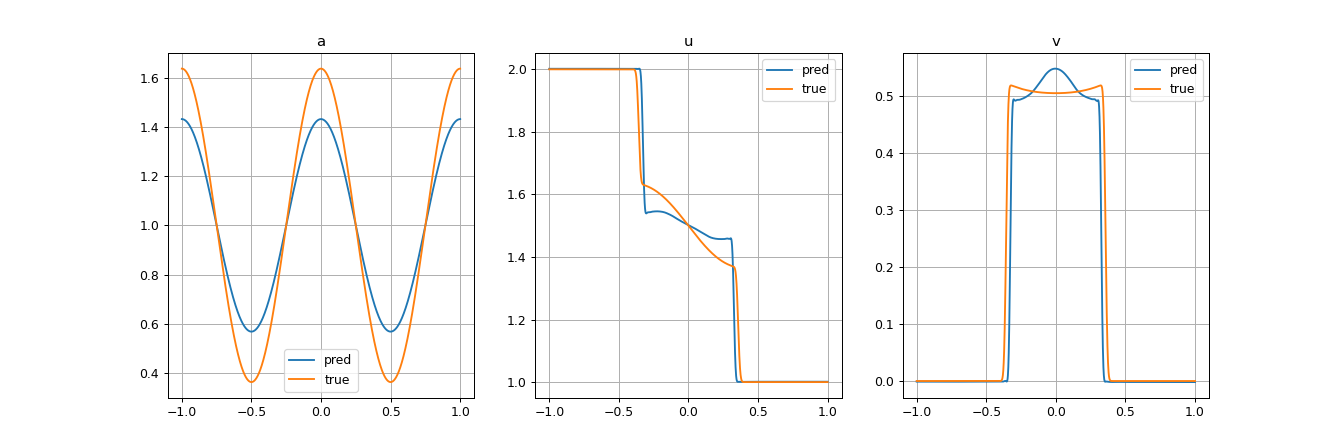

In [5]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 2000).reshape((-1, 1))
a_fn = lambda x: 1+2/np.pi*np.cos(2*np.pi*x)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_2_snapshot_epsilon_0.7.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()

In [6]:
agent.params[1]

DeviceArray([1.3560632], dtype=float32)